In [14]:
import os
current_directory = os.getcwd()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
# Read the CSV file using Pandas
parent_directory = os.path.dirname(current_directory)
# print(parent_directory)
file_path = os.path.join(parent_directory,"Task_4.csv")
data = pd.read_csv(file_path)

In [17]:
# Split the data into features (X) and target variable (Y)
X = data[['Hours_of_Study', 'Hours_of_Sleep']]
Y = data['Exam_Success']

In [18]:
# Split the data into training and testing setsX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [19]:
# Create three binary classifiers using OvR method
#TO DO
model_pass_vs_not_pass = LogisticRegression()
model_fail_vs_not_fail = LogisticRegression()
model_need_more_data_vs_not_need_more_data = LogisticRegression()


In [20]:
# Train the models
 
model_pass_vs_not_pass.fit(X_train, (Y_train == 0).astype(int))
model_fail_vs_not_fail.fit(X_train, (Y_train == 1).astype(int))
model_need_more_data_vs_not_need_more_data.fit(X_train, (Y_train == 2).astype(int))


LogisticRegression()

In [21]:
# Make predictions on the test set
Y_pred_pass_vs_not_pass = model_pass_vs_not_pass.predict(X_test)
Y_pred_fail_vs_not_fail = model_fail_vs_not_fail.predict(X_test)
Y_pred_need_more_data_vs_not_need_more_data = model_need_more_data_vs_not_need_more_data.predict(X_test)


In [22]:
# Combine predictions to get the final predictions
Y_pred_final = np.zeros_like(Y_pred_pass_vs_not_pass)
Y_pred_final[Y_pred_pass_vs_not_pass == 1] = 0  # Pass
Y_pred_final[Y_pred_fail_vs_not_fail == 1] = 1  # Fail
Y_pred_final[Y_pred_need_more_data_vs_not_need_more_data == 1] = 2  # Need More Data


In [23]:
# Evaluate the model (Accuracy)
accuracy = accuracy_score(Y_test, Y_pred_final)
print("Accuracy:", accuracy)

Accuracy: 0.45


C:\Users\vigne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\vigne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\vigne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


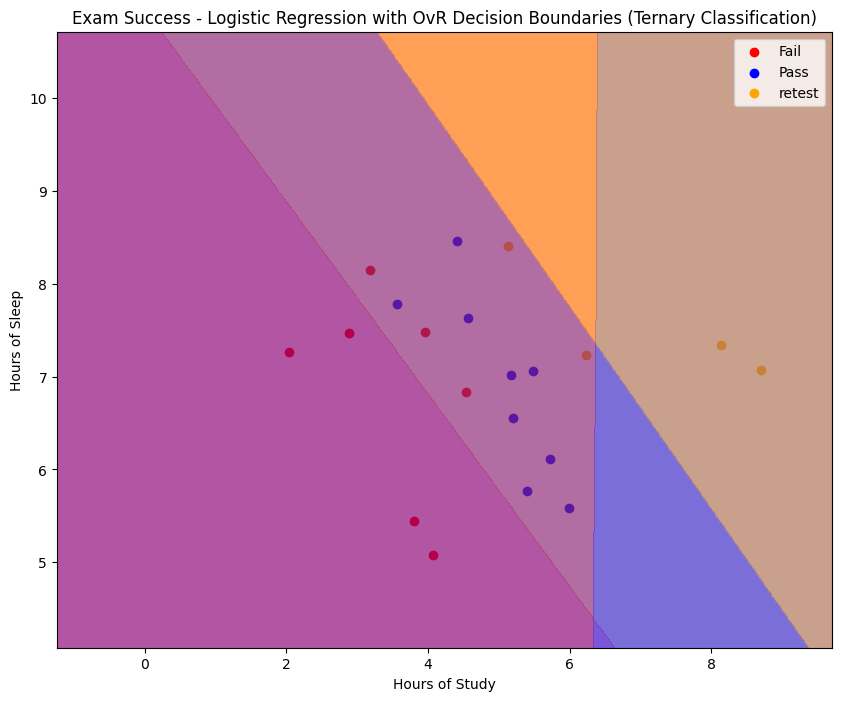

In [24]:
# Plot the decision boundaries for all three outcomes
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X_test[Y_test == 0]['Hours_of_Study'], X_test[Y_test == 0]['Hours_of_Sleep'], color='red', label='Fail')
plt.scatter(X_test[Y_test == 1]['Hours_of_Study'], X_test[Y_test == 1]['Hours_of_Sleep'], color='blue', label='Pass')
plt.scatter(X_test[Y_test == 2]['Hours_of_Study'], X_test[Y_test == 2]['Hours_of_Sleep'], color='orange', label='retest')

# Plot the decision boundaries
x_min, x_max = X['Hours_of_Study'].min() - 1, X['Hours_of_Study'].max() + 1
y_min, y_max = X['Hours_of_Sleep'].min() - 1, X['Hours_of_Sleep'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Decision boundary for 'Pass' vs 'Not Pass'
Z_pass_vs_not_pass = model_pass_vs_not_pass.predict(np.c_[xx.ravel(), yy.ravel()])
Z_pass_vs_not_pass = Z_pass_vs_not_pass.reshape(xx.shape)

# Decision boundary for 'Fail' vs 'Not Fail'
Z_fail_vs_not_fail = model_fail_vs_not_fail.predict(np.c_[xx.ravel(), yy.ravel()])
Z_fail_vs_not_fail = Z_fail_vs_not_fail.reshape(xx.shape)

# Decision boundary for 'Need More Data' vs 'Not Need More Data'
Z_need_more_data_vs_not_need_more_data = model_need_more_data_vs_not_need_more_data.predict(np.c_[xx.ravel(), yy.ravel()])
Z_need_more_data_vs_not_need_more_data = Z_need_more_data_vs_not_need_more_data.reshape(xx.shape)

# Plot decision regions and boundaries
plt.contourf(xx, yy, Z_pass_vs_not_pass, alpha=0.3, levels=[-1, 0, 1], colors=['orange', 'red'])
plt.contourf(xx, yy, Z_fail_vs_not_fail, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.contourf(xx, yy, Z_need_more_data_vs_not_need_more_data, alpha=0.3, levels=[-1, 0, 1], colors=['blue', 'orange'])

# Add labels and legend
plt.xlabel('Hours of Study')
plt.ylabel('Hours of Sleep')
plt.legend()

# Show the plot
plt.title('Exam Success - Logistic Regression with OvR Decision Boundaries (Ternary Classification)')
plt.show()